In [ ]:
import numpy as np # library for numerical computations
import pandas as pd #  library used for data manipulation and analysis
import pylab as pl #  provides a set of functions similar to MATLAB
import matplotlib.pyplot as plt #  library used for creating plots and visualizations
import seaborn as sns
import sklearn as sklearn

%matplotlib inline

In [ ]:
df = pd.read_csv("KAG_conversion_data.csv")

df


,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion
0,30-34,M,15,7350,1,1.430000,2
1,30-34,M,16,17861,2,1.820000,2
2,30-34,M,20,693,0,0.000000,1
3,30-34,M,28,4259,1,1.250000,1
4,30-34,M,28,4133,1,1.290000,1
...,...,...,...,...,...,...,...
1138,45-49,F,109,1129773,252,358.189997,13
1139,45-49,F,110,637549,120,173.880003,3
1140,45-49,F,111,151531,28,40.289999,2
1141,45-49,F,113,790253,135,198.710001,8


In [ ]:
df.describe()

,interest,Impressions,Clicks,Spent,Total_Conversion
count,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000
mean,32.766404,1.867321e+05,33.390201,51.360656,2.855643
std,26.952131,3.127622e+05,56.892438,86.908418,4.483593
min,2.000000,8.700000e+01,0.000000,0.000000,0.000000
25%,16.000000,6.503500e+03,1.000000,1.480000,1.000000
50%,25.000000,5.150900e+04,8.000000,12.370000,1.000000
75%,31.000000,2.217690e+05,37.500000,60.025000,3.000000
max,114.000000,3.052003e+06,421.000000,639.949998,60.000000


In [ ]:
df.describe()

categorical_columns = df.select_dtypes(include=['object'])
categorical_columns.describe()

,age,gender
count,1143,1143
unique,4,2
top,30-34,M
freq,426,592


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns


for column in categorical_columns:
    frequency_table = df[column].value_counts()
    print(frequency_table)


30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64
M    592
F    551
Name: gender, dtype: int64


In [ ]:
df['Total_Conversion'].value_counts()

1     666
2     162
3      78
4      61
5      41
6      22
7      16
8      13
11     13
13      9
0       8
10      8
9       7
17      4
16      4
14      4
12      4
22      4
23      3
26      2
31      2
20      2
24      1
28      1
40      1
15      1
19      1
38      1
60      1
21      1
18      1
30      1
Name: Total_Conversion, dtype: int64

In [ ]:
df.shape

(1143, 7)

In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1143 non-null   object 
 1   gender            1143 non-null   object 
 2   interest          1143 non-null   int64  
 3   Impressions       1143 non-null   int64  
 4   Clicks            1143 non-null   int64  
 5   Spent             1143 non-null   float64
 6   Total_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 62.6+ KB


age                 0
gender              0
interest            0
Impressions         0
Clicks              0
Spent               0
Total_Conversion    0
dtype: int64

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation = numeric_df.corr()

correlation

,interest,Impressions,Clicks,Spent,Total_Conversion
interest,1.000000,0.101973,0.088706,0.070226,0.120270
Impressions,0.101973,1.000000,0.948514,0.970386,0.812838
Clicks,0.088706,0.948514,1.000000,0.992906,0.694632
Spent,0.070226,0.970386,0.992906,1.000000,0.725379
Total_Conversion,0.120270,0.812838,0.694632,0.725379,1.000000


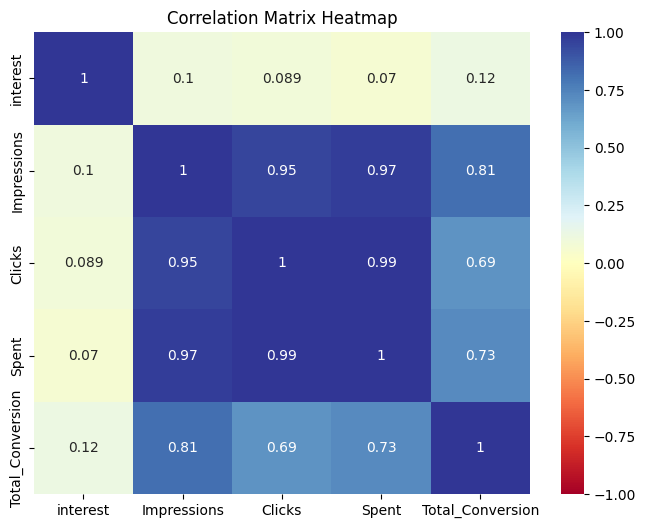

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='RdYlBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df.describe()

,interest,Impressions,Clicks,Spent,Total_Conversion
count,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000
mean,32.766404,1.867321e+05,33.390201,51.360656,2.855643
std,26.952131,3.127622e+05,56.892438,86.908418,4.483593
min,2.000000,8.700000e+01,0.000000,0.000000,0.000000
25%,16.000000,6.503500e+03,1.000000,1.480000,1.000000
50%,25.000000,5.150900e+04,8.000000,12.370000,1.000000
75%,31.000000,2.217690e+05,37.500000,60.025000,3.000000
max,114.000000,3.052003e+06,421.000000,639.949998,60.000000


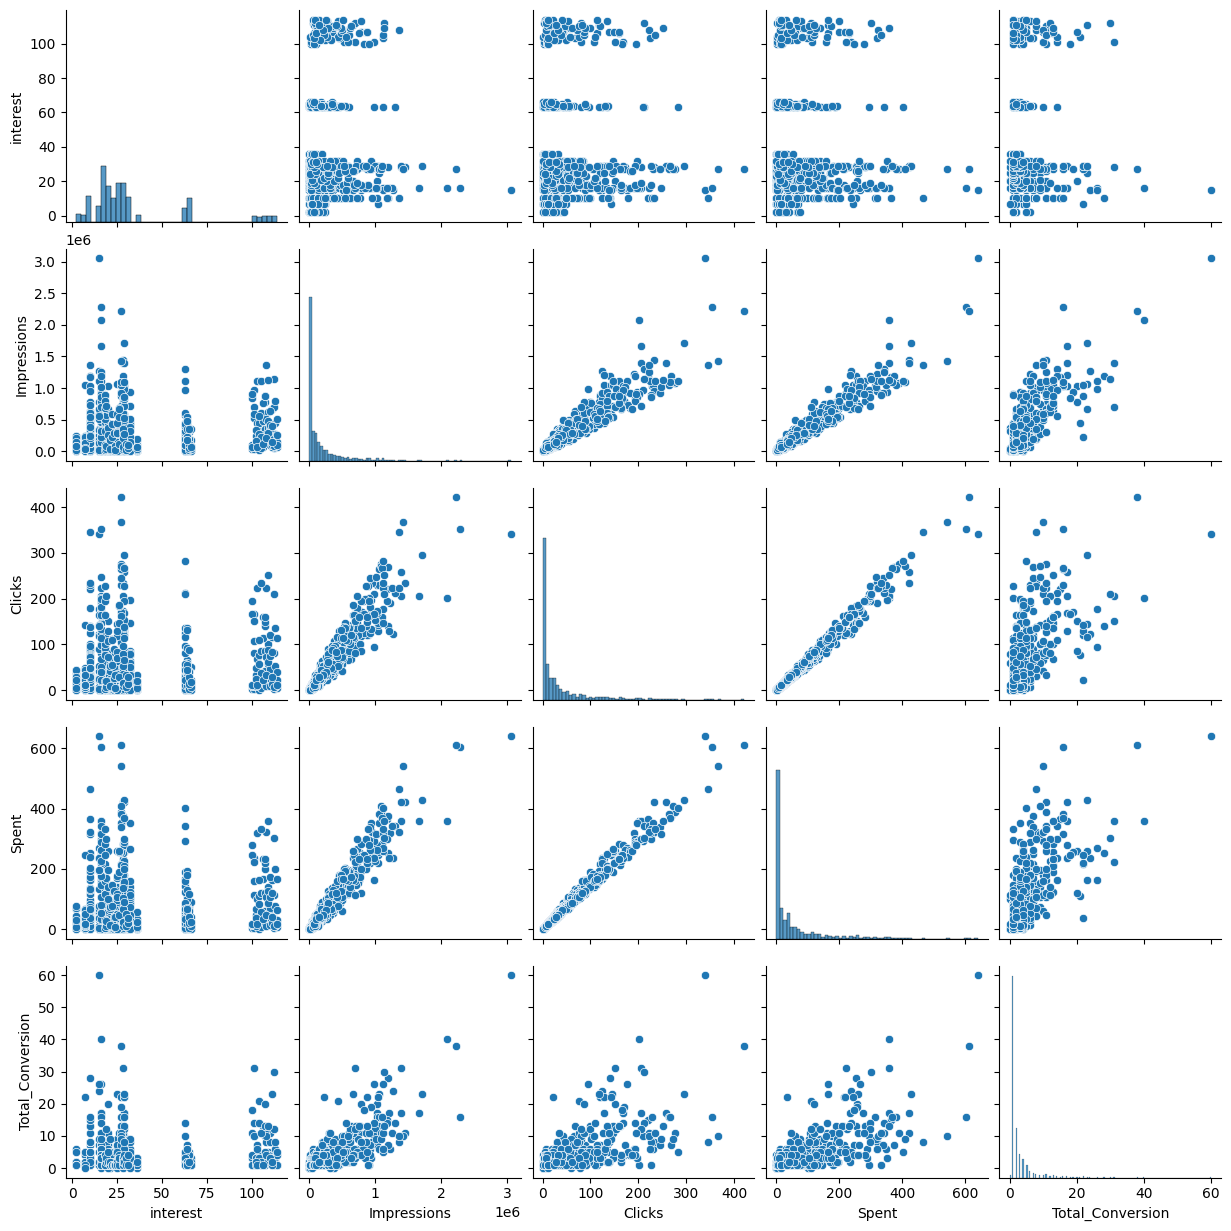

In [ ]:
sns.pairplot(df)

In [ ]:
##Preparing the Data

df.columns


Index(['age', 'gender', 'interest', 'Impressions', 'Clicks', 'Spent',
       'Total_Conversion'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Total_Conversion'])  # Features
y = df['Total_Conversion']  # Target variable

X = pd.get_dummies(X, columns=['age', 'gender'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

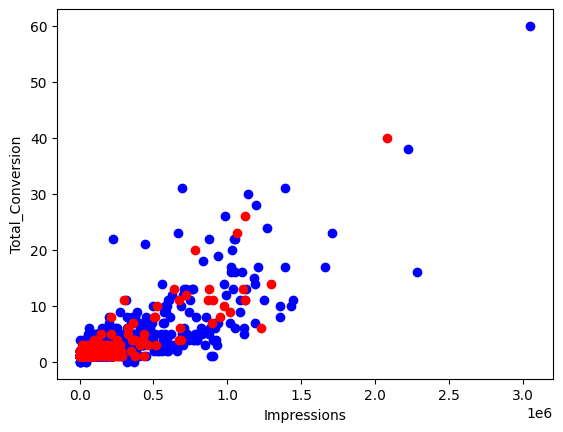

In [ ]:
plt.scatter(X_train['Impressions'], y_train, color='blue')
plt.scatter(X_test['Impressions'], y_test, color='red')
plt.xlabel("Impressions")
plt.ylabel("Total_Conversion")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()


lr01 = lr_model.fit(X_train, y_train)
y_predict = lr01.predict(X_test)


coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr01.coef_})

print(coef_df)


#print ('Coefficients: ', lr01.coef_)
print ('Intercept: ',lr01.intercept_)

ValueError: ignored

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print("Mean absolute error: %.2f" %mae)
print("(MSE): %.2f" %mse)
print(" (RMSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

Mean absolute error: 1.07
(MSE): 3.46
 (RMSE): 1.86
R2-score: 0.82


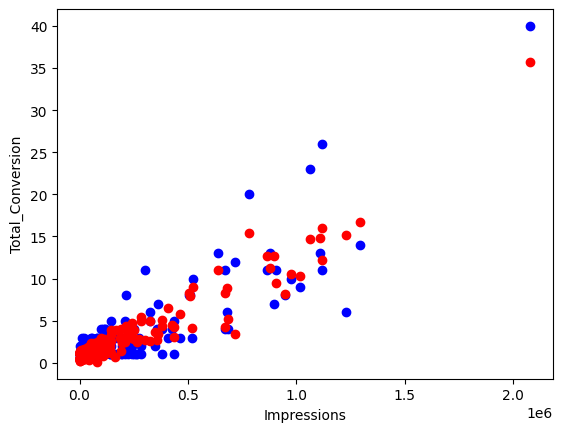

In [ ]:
plt.scatter(X_test['Impressions'], y_test, color='blue')
plt.scatter(X_test['Impressions'], y_predict, color='red')
plt.xlabel("Impressions")
plt.ylabel("Total_Conversion")
plt.show()

In [ ]:
df.columns

Index(['age', 'gender', 'interest', 'Impressions', 'Clicks', 'Spent',
       'Total_Conversion'],
      dtype='object')

In [ ]:
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

one_hot_encoded = one_hot_encoder.fit_transform(df[['age', 'gender']])
columns_names = one_hot_encoder.get_feature_names_out(['age', 'gender'])
df_one_hot = pd.DataFrame(one_hot_encoded, columns=columns_names)

df = pd.concat([df, df_one_hot], axis=1)

df = df.drop(columns=['age', 'gender'])

In [ ]:
one_hot_encoded

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [ ]:
df


,interest,Impressions,Clicks,Spent,Total_Conversion,age_35-39,age_40-44,age_45-49,gender_M
0,15,7350,1,1.430000,2,0.0,0.0,0.0,1.0
1,16,17861,2,1.820000,2,0.0,0.0,0.0,1.0
2,20,693,0,0.000000,1,0.0,0.0,0.0,1.0
3,28,4259,1,1.250000,1,0.0,0.0,0.0,1.0
4,28,4133,1,1.290000,1,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1138,109,1129773,252,358.189997,13,0.0,0.0,1.0,0.0
1139,110,637549,120,173.880003,3,0.0,0.0,1.0,0.0
1140,111,151531,28,40.289999,2,0.0,0.0,1.0,0.0
1141,113,790253,135,198.710001,8,0.0,0.0,1.0,0.0


In [ ]:
df_one_hot

,age_35-39,age_40-44,age_45-49,gender_M
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
1138,0.0,0.0,1.0,0.0
1139,0.0,0.0,1.0,0.0
1140,0.0,0.0,1.0,0.0
1141,0.0,0.0,1.0,0.0


In [ ]:
df_one_hot.columns

Index(['age_35-39', 'age_40-44', 'age_45-49', 'gender_M'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X2 = df.drop(columns=['Total_Conversion'])
y2 = df['Total_Conversion']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()


lr02 = lr_model.fit(X2_train, y2_train)
y2_test_predict = lr02.predict(X2_test)
y2_train_predict = lr02.predict(X2_train)


coef_df = pd.DataFrame({'Feature': X2.columns, 'Coefficient': lr02.coef_})

print(coef_df)


#print ('Coefficients: ', lr01.coef_)
print ('Intercept: ',lr02.intercept_)

       Feature  Coefficient
0     interest     0.002460
1  Impressions     0.000026
2       Clicks     0.005481
3        Spent    -0.056391
4    age_35-39    -0.658442
5    age_40-44    -0.749119
6    age_45-49    -0.702095
7     gender_M    -0.187454
Intercept:  1.164211132750253


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y2_test, y2_test_predict)
mse = mean_squared_error(y2_test, y2_test_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y2_test, y2_test_predict)

print("(MAE): %.2f" %mae)
print("(MSE): %.2f" %mse)
print("(RMSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

(MAE): 1.07
(MSE): 3.46
(RMSE): 1.86
R2-score: 0.82


In [ ]:


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y2_train, y2_train_predict)
mse = mean_squared_error(y2_train, y2_train_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y2_train, y2_train_predict)

print("Mean absolute error: %.2f" %mae)
print("Residual sum of squares (MSE): %.2f" %mse)
print("Residual sum of squares (MSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

Mean absolute error: 1.28
Residual sum of squares (MSE): 5.79
Residual sum of squares (MSE): 2.41
R2-score: 0.72


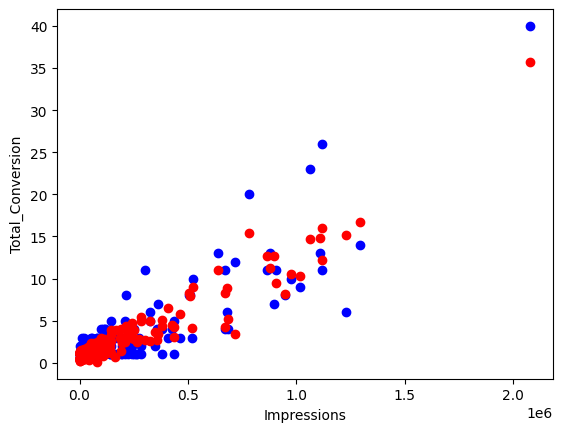

In [ ]:
plt.scatter(X2_test['Impressions'], y2_test, color='blue')
plt.scatter(X2_test['Impressions'], y2_test_predict, color='red')
plt.xlabel("Impressions")
plt.ylabel("Total_Conversion")
plt.show()

In [ ]:
#Calculation of Error Using pre-built functions

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y2_train, y2_train_predict)
mse = mean_squared_error(y2_train, y2_train_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y2_train, y2_train_predict)

print("Mean absolute error: %.2f" %mae)
print("Residual sum of squares (MSE): %.2f" %mse)
print("Residual sum of squares (MSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

Mean absolute error: 1.28
Residual sum of squares (MSE): 5.79
Residual sum of squares (MSE): 2.41
R2-score: 0.72


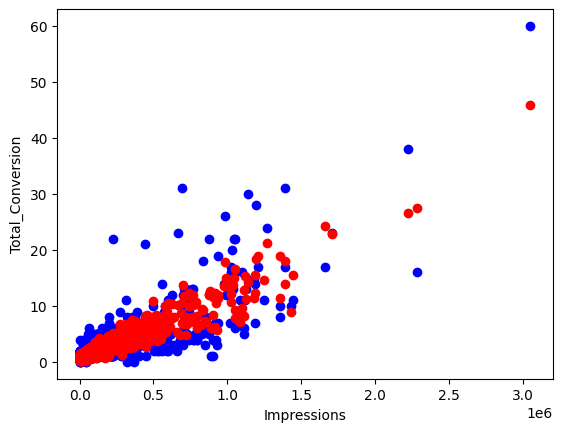

In [ ]:
plt.scatter(X2_train['Impressions'], y2_train, color='blue')
plt.scatter(X2_train['Impressions'], y2_train_predict, color='red')
plt.xlabel("Impressions")
plt.ylabel("Total_Conversion")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [ ]:
X2_train

,interest,Impressions,Clicks,Spent,age_35-39,age_40-44,age_45-49,gender_M
12,16,5117,0,0.000000,0.0,0.0,0.0,1.0
758,10,478480,75,135.750001,0.0,0.0,1.0,1.0
636,19,76355,9,14.630000,1.0,0.0,0.0,1.0
1109,109,475184,88,127.320003,1.0,0.0,0.0,0.0
743,32,208572,36,60.760000,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1044,64,179894,43,66.839999,0.0,0.0,1.0,0.0
1095,105,596831,86,120.879999,0.0,0.0,0.0,0.0
1130,101,589270,107,158.050002,0.0,0.0,1.0,0.0
860,27,2223278,421,612.300003,0.0,0.0,0.0,0.0


In [ ]:
##KFold


from sklearn.model_selection import KFold


kf = KFold(shuffle=True,
           random_state=72018,
           n_splits=5)

In [ ]:
for train_index, test_index in kf.split(X_train):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 1  2  3  5  6  7  8  9 10 11] 731
Test index: [ 0  4 17 23 32 33 38 40 49 50] 183

Train index: [ 0  2  3  4  5  7  8  9 10 11] 731
Test index: [ 1  6 12 15 16 25 26 31 46 53] 183

Train index: [ 0  1  3  4  5  6  7  8 10 11] 731
Test index: [ 2  9 19 24 29 30 34 35 41 43] 183

Train index: [ 0  1  2  4  6  8  9 10 11 12] 731
Test index: [ 3  5  7 14 21 22 27 36 39 44] 183

Train index: [ 0  1  2  3  4  5  6  7  9 12] 732
Test index: [ 8 10 11 13 18 20 28 37 42 45] 182



In [ ]:
from sklearn.model_selection import KFold


kf3 = KFold(shuffle=True,
           random_state=72018,
           n_splits=3)

In [ ]:
for train_index, test_index in kf3.split(X_train):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 2  3  5  7  8  9 10 11 13 14] 609
Test index: [ 0  1  4  6 12 16 17 23 25 26] 305

Train index: [ 0  1  3  4  5  6  7  8 10 11] 609
Test index: [ 2  9 15 19 24 27 29 30 31 34] 305

Train index: [ 0  1  2  4  6  9 12 15 16 17] 610
Test index: [ 3  5  7  8 10 11 13 14 18 20] 304



In [ ]:


scores02_val = []
lr = LinearRegression()

for train_index, test_index in kf.split(X2_train):
    X2cv_train, X2cv_test, y2cv_train, y2cv_test = (X2.iloc[train_index, :],
                                                    X2.iloc[test_index, :],
                                                    y2[train_index],
                                                    y2[test_index])

    lr02_val = lr.fit(X2cv_train, y2cv_train)

    y2cv_pred = lr02_val.predict(X2cv_test)

    score02_val = r2_score(y2cv_test.values, y2cv_pred)

    scores02_val.append(score02_val)

scores02_val

[0.8387681673913039,
 0.8143296343880377,
 0.734773683752586,
 0.8264714626188168,
 0.6730561921180311]

In [ ]:
np.mean(scores02_val)

0.7774798280537552

In [ ]:


scores01_val = []
lr = LinearRegression()

for train_index, test_index in kf.split(X_train):
    Xcv_train, Xcv_test, ycv_train, ycv_test = (X.iloc[train_index, :],
                                                X.iloc[test_index, :],
                                                y[train_index],
                                                y[test_index])

    lr01_val = lr.fit(Xcv_train, ycv_train)

    ycv_pred = lr01_val.predict(Xcv_test)

    score01_val = r2_score(ycv_test.values, ycv_pred)

    scores01_val.append(score01_val)

scores01_val

[0.8387681673913041,
 0.814329634388038,
 0.7347736837525861,
 0.8264714626188168,
 0.6730561921180307]

In [ ]:
np.mean(scores01_val)

0.7774798280537552

In [ ]:
from sklearn.model_selection import GridSearchCV

estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures()),
        ("linear_regression", LinearRegression())])

params = {
    'polynomial_features__degree': [1, 2, 3],

}

lr02_poly = GridSearchCV(estimator, params, cv=kf)

In [ ]:
lr02_poly.fit(X2, y2)

GridSearchCV(cv=KFold(n_splits=5, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('linear_regression',
                                        LinearRegression())]),
             param_grid={'polynomial_features__degree': [1, 2, 3]})

In [ ]:
lr02_poly.best_score_, lr02_poly.best_params_

(0.7276908346252493, {'polynomial_features__degree': 2})

In [ ]:
pf = PolynomialFeatures(degree=2)

lr02_poly2 = Pipeline([
                    ("make_higher_degree", pf),
                    ("linear_regression", LinearRegression())])

lr02_poly2 = lr02_poly2.fit(X2, y2)
lr02_poly2.score(X2, y2)

0.8046882816515938

In [ ]:
coef_df = pd.DataFrame({'Feature': lr02_poly2.named_steps["make_higher_degree"].get_feature_names_out(),
                        'Coefficient': lr02_poly2.named_steps["linear_regression"].coef_})

print(coef_df)

print ('Intercept: ',lr02_poly2.named_steps["linear_regression"].intercept_)

                  Feature   Coefficient
0                       1 -5.069351e-06
1                interest -2.232923e-02
2             Impressions  1.763989e-05
3                  Clicks  9.523090e-02
4                   Spent -1.007827e-01
5               age_35-39  1.456561e-01
6               age_40-44 -1.358769e-01
7               age_45-49 -7.625050e-02
8                gender_M -4.334065e-04
9              interest^2  2.479726e-04
10   interest Impressions  1.977285e-08
11        interest Clicks -2.163821e-04
12         interest Spent  2.984610e-04
13     interest age_35-39 -1.079007e-02
14     interest age_40-44  4.669156e-03
15     interest age_45-49 -3.797349e-04
16      interest gender_M -9.832746e-03
17          Impressions^2 -1.036671e-11
18     Impressions Clicks -4.368849e-08
19      Impressions Spent  1.304693e-07
20  Impressions age_35-39 -8.759288e-06
21  Impressions age_40-44 -3.114971e-05
22  Impressions age_45-49 -2.698560e-05
23   Impressions gender_M  8.802338e-06


In [ ]:
lr02_poly2.named_steps["make_higher_degree"].get_feature_names_out()

array(['1', 'interest', 'Impressions', 'Clicks', 'Spent', 'age_35-39',
       'age_40-44', 'age_45-49', 'gender_M', 'interest^2',
       'interest Impressions', 'interest Clicks', 'interest Spent',
       'interest age_35-39', 'interest age_40-44', 'interest age_45-49',
       'interest gender_M', 'Impressions^2', 'Impressions Clicks',
       'Impressions Spent', 'Impressions age_35-39',
       'Impressions age_40-44', 'Impressions age_45-49',
       'Impressions gender_M', 'Clicks^2', 'Clicks Spent',
       'Clicks age_35-39', 'Clicks age_40-44', 'Clicks age_45-49',
       'Clicks gender_M', 'Spent^2', 'Spent age_35-39', 'Spent age_40-44',
       'Spent age_45-49', 'Spent gender_M', 'age_35-39^2',
       'age_35-39 age_40-44', 'age_35-39 age_45-49', 'age_35-39 gender_M',
       'age_40-44^2', 'age_40-44 age_45-49', 'age_40-44 gender_M',
       'age_45-49^2', 'age_45-49 gender_M', 'gender_M^2'], dtype=object)

In [ ]:
y2_poly2_pred = lr02_poly2.predict(X2)

In [ ]:
r2_score(y2,y2_poly2_pred)

0.8046882816515938

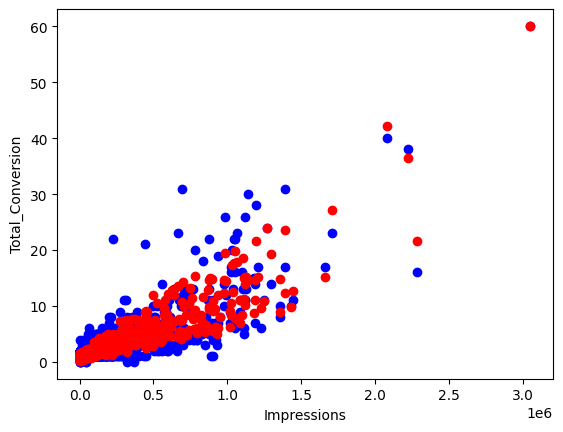

In [ ]:
plt.scatter(X['Impressions'], y, color='blue')
plt.scatter(X['Impressions'], y2_poly2_pred, color='red')
plt.xlabel("Impressions")
plt.ylabel("Total_Conversion")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y2,y2_poly2_pred)
mse = mean_squared_error(y2,y2_poly2_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y2,y2_poly2_pred)

print("Mean absolute error: %.2f" %mae)
print("Residual sum of squares (MSE): %.2f" %mse)
print("Residual sum of squares (MSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

Mean absolute error: 1.04
Residual sum of squares (MSE): 3.92
Residual sum of squares (MSE): 1.98
R2-score: 0.80


In [ ]:
##HyperParameter Tuning

alphas = np.geomspace(1e-9, 1e0, num=10)
alphas


array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [ ]:


s = StandardScaler()
lr = LinearRegression()

estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

alphas = np.geomspace(1e-9, 1e0, num=10)
s = StandardScaler()
lr_l1 = Lasso(alpha=alphas)


estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': [0.0001,0.001,0.05,0.1,1]

}

lr_l1 = GridSearchCV(estimator, params, cv=kf)

In [ ]:
lr02_poly_l1 = lr_l1.fit(X2, y2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.928e+02, tolerance: 1.969e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.585e+02, tolerance: 1.704e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.277e+01, tolerance: 1.844e

In [ ]:
lr02_poly_l1.best_score_, lr02_poly_l1.best_params_

(0.757069741279718,
 {'lasso_regression__alpha': 0.05, 'polynomial_features__degree': 2})

In [ ]:
pf = PolynomialFeatures(degree=2)

lr02_poly2_l1_001 = Pipeline([("scaler", StandardScaler()),
                            ("polynomial_features", PolynomialFeatures(degree=2)),
                            ("lasso_regression", Lasso(alpha=0.001))])

lr02_poly2_l1 = lr02_poly2_l1_001.fit(X2_train, y2_train)
lr02_poly2_l1.score(X2_test, y2_test)

coef_df = pd.DataFrame({'Feature': lr02_poly2.named_steps["make_higher_degree"].get_feature_names_out(),
                        'Coefficient': lr02_poly2_l1.named_steps["lasso_regression"].coef_})

print(coef_df)

print ('Intercept: ',lr02_poly2_l1.named_steps["lasso_regression"].intercept_)

                  Feature  Coefficient
0                       1     0.000000
1                interest     0.025018
2             Impressions     3.259673
3                  Clicks     0.000000
4                   Spent    -0.409527
5               age_35-39    -0.121329
6               age_40-44    -0.000000
7               age_45-49    -0.202923
8                gender_M     0.259550
9              interest^2     0.182734
10   interest Impressions    -0.175247
11        interest Clicks    -0.233098
12         interest Spent     1.103438
13     interest age_35-39    -0.168207
14     interest age_40-44    -0.003896
15     interest age_45-49    -0.122952
16      interest gender_M    -0.131736
17          Impressions^2    -0.007387
18     Impressions Clicks     1.135376
19      Impressions Spent    -0.481015
20  Impressions age_35-39    -0.313248
21  Impressions age_40-44    -2.729666
22  Impressions age_45-49    -1.817505
23   Impressions gender_M     1.932935
24               Clicks^2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.350e+03, tolerance: 1.863e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
y2_lr02_poly_l1_pred = lr02_poly_l1.predict(X2)

r2_score(y2,y2_poly2_pred)

0.8046882816515938

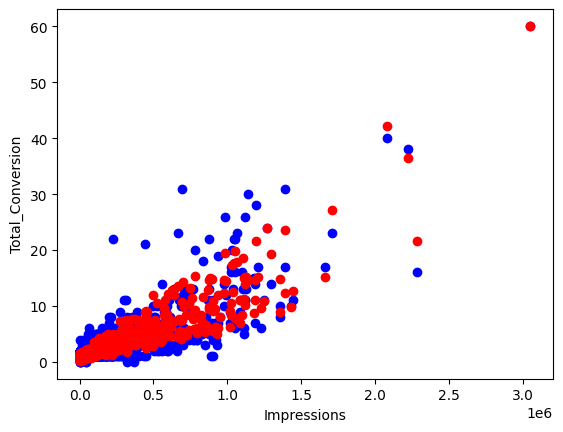

In [ ]:
plt.scatter(X['Impressions'], y, color='blue')
plt.scatter(X['Impressions'], y2_poly2_pred, color='red')
plt.xlabel("Impressions")
plt.ylabel("Total_Conversion")
plt.show()

In [ ]:


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y2,y2_lr02_poly_l1_pred)
mse = mean_squared_error(y2,y2_lr02_poly_l1_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y2,y2_lr02_poly_l1_pred)

print("Mean absolute error: %.2f" %mae)
print("Residual sum of squares (MSE): %.2f" %mse)
print("Residual sum of squares (MSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

Mean absolute error: 1.03
Residual sum of squares (MSE): 4.26
Residual sum of squares (MSE): 2.06
R2-score: 0.79
